In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import jieba

In [3]:
# read in excel
BenzC= pd.read_csv('data_C.csv')
print(BenzC.shape)
# BenzC.head()
BenzE=pd.read_csv('data_E.csv')
BenzE.shape

(3098, 12)


(1718, 12)

In [4]:
def cut_word(text):
  a = " ".join(list(jieba.cut(text)))
  return a

In [5]:
review=BenzC['review']
reviewE=BenzE['review']

In [6]:
# 计算在store_items中NaN值的个数
x = review.isnull().sum()

print('在Comments中NaN的数量:', x)
print('共有评论:',len(BenzC['review']))
print('在评论的列中具有非NaN值得数量分别为:', BenzC['review'].count())

在Comments中NaN的数量: 36
共有评论: 3098
在评论的列中具有非NaN值得数量分别为: 3062


In [7]:
y = reviewE.isnull().sum()

print('在Comments中NaN的数量:', y)
print('共有评论:',len(reviewE))
print('在评论的列中具有非NaN值得数量分别为:', reviewE.count())

在Comments中NaN的数量: 10
共有评论: 1718
在评论的列中具有非NaN值得数量分别为: 1708


In [8]:
# 删除包含NaN值的任何行
review.dropna(axis = 0, inplace=True)
x = review.isnull().sum()
x
reviewE.dropna(axis = 0, inplace=True)
y = reviewE.isnull().sum()
y

0

In [9]:
goodcom=[]
badcom=[]
i=0
# for sent in BenzC['review']:
for sent in review:
    i+=1
#     print(i)
    comments=sent.split('\n')
    goodcom.append(cut_word(comments[1]))
    if len(comments)>3:
        badcom.append(cut_word(comments[3]))
print(i)
print("最满意共：",len(goodcom),type(goodcom))
print("最不满意共：",len(badcom),type(badcom))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/xd/_xqqh_191qv3bm98spjk7cnw0000gn/T/jieba.cache
Loading model cost 1.020 seconds.
Prefix dict has been built successfully.


3062
最满意共： 3062 <class 'list'>
最不满意共： 2936 <class 'list'>


In [10]:
goodcomE=[]
badcomE=[]
i=0
# for sent in BenzC['review']:
for sent in reviewE:
    i+=1
#     print(i)
    commentsE=sent.split('\n')
    goodcomE.append(cut_word(commentsE[1]))
    if len(commentsE)>3:
        badcomE.append(cut_word(commentsE[3]))
print(i)
print("最满意共：",len(goodcomE),type(goodcomE))
print("最不满意共：",len(badcomE),type(badcomE))

1708
最满意共： 1708 <class 'list'>
最不满意共： 1674 <class 'list'>


In [10]:
# goodcomE=[]
# badcomE=[]
# i=0
# for sent in reviewE:
#     i+=1
# #     print(i)
#     commentsE=sent.split('\n')
#     segs=[]
#     segs = jieba.cut(commentsE[1], cut_all=False)
#     segs = [word for word in list(segs) if word not in stoplist]
#     goodcomE+=segs
    
#     if len(commentsE)>4:
#         segs2=[]                                                                                # type(comments)=list
#         segs2 = jieba.cut(commentsE[3], cut_all=False)
#         segs2 = [word for word in list(segs2) if word not in stoplist]
#         badcomE+=segs2
    
# # print(i)
# print("最满意共：",len(goodcomE),type(goodcomE))
# print("最不满意共：",len(badcomE))

最满意共： 24327 <class 'list'>
最不满意共： 24641


## **最满意和最不满意comments导出txt**

In [11]:
# Benz_C
data = open("satisfied_C.txt",'w',encoding="utf-8")
for i in range(len(goodcom)):
  print(goodcom[i],file=data)
data.close()

data = open("unsatisfied_C.txt",'w',encoding="utf-8")
for i in range(len(badcom)):
  print(badcom[i],file=data)
data.close()

In [12]:
# Benz_E
data = open("satisfied_E.txt",'w',encoding="utf-8")
for i in range(len(goodcomE)):
  print(goodcomE[i],file=data)
data.close()

data = open("unsatisfied_E.txt",'w',encoding="utf-8")
for i in range(len(badcomE)):
  print(badcomE[i],file=data)
data.close()

## **DBSCAN：Benz_C**

In [13]:
import jieba
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics

class DbscanClustering():
    def __init__(self, stopwords_path=None):
        self.stopwords = self.load_stopwords(stopwords_path)
        self.vectorizer = CountVectorizer()
        self.transformer = TfidfTransformer()

    def load_stopwords(self, stopwords=None):
        if stopwords:
            with open(stopwords, 'r', encoding='utf-8') as f:
                return [line.strip() for line in f]
        else:
            return []

    def preprocess_data(self, corpus_path):
        corpus = []
        with open(corpus_path, 'r', encoding='utf-8') as f:
            for line in f:
                corpus.append(' '.join([word for word in jieba.lcut(line.strip()) if word not in self.stopwords]))
        return corpus

    def get_text_tfidf_matrix(self, corpus):
        tfidf = self.transformer.fit_transform(self.vectorizer.fit_transform(corpus))

        # 获取词袋中所有词语
        words = self.vectorizer.get_feature_names()

        # 获取tfidf矩阵中权重
        weights = tfidf.toarray()
        
#         print("weights is: ",weights)
        print("words is: ",len(words))
        print("words is: ",words)

    
        return weights,words

    def pca(self, weights, n_components=2):
        pca = PCA(n_components=n_components)
        return pca.fit_transform(weights)

    def dbscan(self, corpus_path, eps=0.1, min_samples=3, fig=True):
      
        corpus = self.preprocess_data(corpus_path)
        weights,words = self.get_text_tfidf_matrix(corpus)
        
        print("weight",weights.shape)
        
        pca_weights = self.pca(weights)
    
        clf = DBSCAN(eps=eps, min_samples=min_samples)
        db=clf.fit(pca_weights)
        labels = db.labels_
        print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(pca_weights, labels))
        # Silhouette Coefficient接近1，则说明样本i聚类合理
        # Silhouette Coefficient接近-1，则说明样本i更应该分类到另外的簇
        # 若Silhouette Coefficient近似为0，则说明样本i在两个簇的边界上

        y = clf.fit_predict(pca_weights)
        print("y is:",y)

        if fig:
            plt.scatter(pca_weights[:, 0], pca_weights[:, 1], c=y)
            plt.show()

        result = {}
        for text_idx, label_idx in enumerate(y):
            if label_idx not in result:
                result[label_idx] = [text_idx]
            else:
                result[label_idx].append(text_idx)
        return result,words,weights,labels
# 满意        
if __name__ == '__main__':
    dbscan = DbscanClustering(stopwords_path='STOP.txt')
    result,words,weights,labels = dbscan.dbscan('satisfied_C.txt', eps=0.05, min_samples=10,fig=True)

words is:  4531
words is:  ['01', '0t', '10', '100', '100km', '101', '10l', '11', '115kw', '12', '1200km', '120km', '126', '12w', '13', '14', '1477', '14w', '15', '150rpm', '15mm', '15w', '1600', '16000', '16w', '17', '175', '176', '178', '180', '180k', '180l', '182', '1843', '18t', '190', '193cm', '1w', '1w6', '20', '200', '20000', '2000rpm', '200l', '2012', '2013', '204', '204p', '20km', '20p', '20t', '21', '211', '2150', '220', '220v', '231', '24', '240', '245', '24km', '2500', '2500rpm', '256km', '26', '260', '260l', '26761km', '2680', '270', '275800', '2850', '2920', '2t', '2w', '30', '300', '3000', '3000rpm', '30km', '30w', '310', '3100', '3131', '3200', '328', '328i', '330', '3500', '3500rpm', '36', '360', '38', '3d', '3w', '40', '4000', '40km', '41', '425', '430', '43w', '4500', '453', '485', '48v', '49', '4s', '4s店', '50', '500', '5000', '500km', '50w', '525li', '528', '52w', '560', '58', '5800', '5vusb', '600', '6000rpm', '60km', '624km', '6400', '67', '68000', '687', '69000'

Silhouette Coefficient: 0.636
y is: [0 0 0 ... 0 0 0]


<Figure size 640x480 with 1 Axes>

In [14]:
print("共计C系列满意评论clusters：",len(result))
for i in result:
    print(i,type(result[i]),len(result[i]))
    length = len(result[i])
    print( words[result[i][length-6]], words[result[i][length-1]],words[result[i][length-2]],words[result[i][length-3]],
          words[result[i][length-4]],words[result[i][length-5]],words[result[i][length-7]],words[result[i][length-8]])
   

共计C系列满意评论clusters： 5
0 <class 'list'> 2854
电耳太 电话 电视信号 电脑屏幕 电脑 电耳酷 电耳 电源
-1 <class 'list'> 73
火石 猫咪 独立 爆同 灯美到 灯大赞 滤震 满满
1 <class 'list'> 40
沃尔沃 物品 熟悉 照顾 点歌 满分 汉化 永远
2 <class 'list'> 65
滚动 甩同 用杯 特别 灯泡 灯一变 浪漫 测速
3 <class 'list'> 30
来电 热爱生活 气势 比前 正副 极光 有用 更长


In [15]:
# === Define the function of classify the original corpus according to the labels === #
def labels_to_original(labels, words):
#     assert len(labels) == len(words)
    max_label = max(labels)
    number_label = [i for i in range(0, max_label + 1, 1)]
    number_label.append(-1)
    result = [[] for i in range(len(number_label))]
    for i in range(len(labels)):
        index = number_label.index(labels[i])
        result[index].append(words[i])
    return result

labels_original = labels_to_original(labels, words)
for i in range(5):
    print(labels_original[i])
    print()

['01', '0t', '10', '100', '100km', '101', '10l', '11', '115kw', '12', '1200km', '120km', '126', '12w', '13', '14', '1477', '14w', '15', '150rpm', '15mm', '15w', '1600', '16000', '16w', '17', '175', '176', '178', '180', '180k', '180l', '182', '1843', '18t', '190', '193cm', '1w', '1w6', '20', '200', '20000', '2000rpm', '200l', '2012', '2013', '204', '204p', '20km', '20p', '20t', '21', '211', '2150', '220', '220v', '231', '24', '240', '245', '24km', '2500', '2500rpm', '256km', '260', '260l', '26761km', '2680', '270', '275800', '2850', '2920', '2t', '2w', '30', '300', '3000', '3000rpm', '30km', '30w', '310', '3100', '3131', '3200', '328', '328i', '330', '3500', '3500rpm', '36', '360', '38', '3d', '3w', '40', '4000', '40km', '41', '425', '430', '43w', '4500', '453', '485', '48v', '49', '4s', '4s店', '50', '500', '5000', '500km', '50w', '525li', '528', '52w', '560', '58', '5800', '5vusb', '600', '6000rpm', '60km', '624km', '6400', '67', '68000', '687', '69000', '6w', '70', '700', '70km', '75k

words is:  4694
words is:  ['10', '100w', '10km', '10w', '11', '120a', '12v', '13000', '1400', '155', '15l', '16', '168', '173', '173cm', '175', '178', '1780', '180', '1800', '180cm', '180cm200', '180com', '180l', '181', '181cm', '182', '182cm', '184cm', '185', '190cm', '1924', '1s', '1w', '200', '20000', '200l', '206', '20km', '220v', '225', '2300', '23000', '245', '24km', '2500', '2500km', '250km', '260', '260l', '270800', '2740', '2760', '2850mm', '29', '2w', '30', '300', '3000', '3000km', '300km', '3022', '308s1', '30cm', '30km', '30w', '3200', '320li', '35w', '360', '4000', '40000', '4008181188', '40w', '445', '45000', '46', '4700mm', '48v', '4900', '4s', '4sunziqiangjian8500', '4s店', '50', '500', '5000', '50000', '525', '5800', '5at', '5km', '600', '6000', '60000', '60km', '640', '6k', '700', '78', '7at', '7du7', '7g', '800', '808', '8at', '9at', 'a0', 'a4', 'a4l', 'a5', 'a6l', 'abes', 'abs', 'acc', 'amg', 'app', 'apple', 'atsl', 'auto', 'autohold', 'b180', 'baby', 'bba', 'benz',

Silhouette Coefficient: 0.599
y is: [0 0 1 ... 0 0 0]


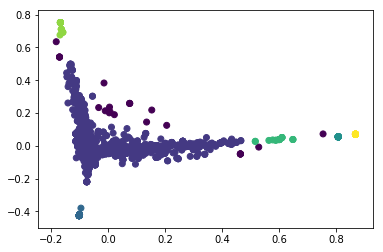

In [16]:
# 不满意
if __name__ == '__main__':
    dbscan2 = DbscanClustering(stopwords_path='STOP.txt')
    result2,words2,weights2,labels2 = dbscan.dbscan('unsatisfied_C.txt', eps=0.05, min_samples=10,fig=True)

In [17]:
print("共计C系列不满意clusters：",len(result2))
for i in result2:
    print(i,type(result2[i]),len(result2[i]))
    length = len(result2[i])
    print( words2[result2[i][length-6]], words2[result2[i][length-1]],words2[result2[i][length-2]],words2[result2[i][length-3]],
          words2[result2[i][length-4]],words2[result2[i][length-5]],words2[result2[i][length-7]],words2[result2[i][length-8]])
      

共计C系列不满意clusters： 7
0 <class 'list'> 2758
比较烦 毫不犹豫 毛衣 毛糙 毛病 比较简单 比较慢 比较复杂
1 <class 'list'> 41
c180l es300h e400l cvt coupe comfort c180 bug
2 <class 'list'> 39
尖叫 拉图 开关门 幽幽 差异 工地 小家子气 对手
-1 <class 'list'> 25
性格 有溜车 星辉 整洁 所说 悲哀 性感 思考
3 <class 'list'> 19
尾门 比例 期间 推脱 幸亏 常有 小s 实用性
4 <class 'list'> 19
慢速度 有点像 晕晕 显现 早点 无极 想换 归纳
5 <class 'list'> 35
差评 档降 收尾 很蛋 开门 平时 差劲 少个


In [18]:
labels_original2 = labels_to_original(labels2, words2)
for i in range(5):
    print(labels_original2[i])
    print()

['10', '100w', '10w', '11', '120a', '12v', '13000', '1400', '155', '15l', '16', '168', '173', '175', '178', '180', '1800', '180cm', '180cm200', '180l', '181', '181cm', '182', '182cm', '185', '190cm', '1w', '200', '20000', '20km', '225', '23000', '245', '24km', '2500km', '250km', '260l', '2740', '2850mm', '29', '30', '300', '3000', '3000km', '300km', '3022', '308s1', '30cm', '30km', '30w', '3200', '320li', '35w', '360', '4000', '40000', '4008181188', '40w', '445', '45000', '48v', '4900', '4sunziqiangjian8500', '4s店', '50', '500', '5000', '50000', '525', '5800', '5km', '6000', '60km', '700', '7at', '7du7', '800', '8at', '9at', 'a4', 'a4l', 'a5', 'a6l', 'abes', 'abs', 'amg', 'app', 'apple', 'auto', 'b180', 'benz', 'bmw', 'bmw325i', 'c200', 'c200l', 'c260', 'c260amg', 'c260l', 'c300', 'c300l', 'c63', 'c63amg', 'carplay', 'cclass', 'cd', 'cgi', 'cm', 'comand', 'comanndo', 'conmand', 'cruise', 'cts', 'd1', 'd2', 'd3', 'ds5', 'dsg', 'duang', 'dvd', 'eco', 'edition', 'es', 'esp', 'excuse', 'g2

# Benz_E

words is:  3798
words is:  ['10', '105km', '12', '13', '14', '1800', '18200', '184ps300nm', '1w9', '20', '200', '200l', '2011', '2012', '20w', '211', '2200', '234', '23p', '243ps', '245', '2500', '255', '2554018', '260', '2601', '260l', '280', '2800', '2rmb', '300', '300l', '33w', '360', '3700', '3d', '3e', '40r18', '40w', '430', '4300k', '45', '46', '47w', '4matic', '4s', '4s店', '5000', '50w', '523', '525', '53', '555', '570', '59w', '5at', '5m', '60', '6000', '62', '666', '66666666666', '68', '6at', '7000', '8at', '90', '980', '9at', '9l', 'a6', 'a6l', 'a7', 'a8', 'ac', 'amg', 'app', 'audi', 'bb', 'benz', 'bmw', 'bmw5', 'c300ge', 'c63amg', 'carplay', 'cc', 'cd', 'china', 'cla', 'cls', 'command', 'ct6', 'diy', 'dpr', 'dvd', 'e1', 'e200', 'e200l', 'e230', 'e260', 'e260l', 'e300', 'e300l', 'e320', 'e320l', 'e63', 'easy', 'eco', 'ecu', 'fix', 'g5', 'gla', 'glk', 'gps', 'great', 'gv', 'hold', 'in', 'ld', 'lde', 'led', 'low', 'm1', 'm272', 'made', 'maliya188', 'mb', 'mbux', 'mercedes', 'me

Silhouette Coefficient: 0.838
y is: [0 1 0 ... 0 0 0]


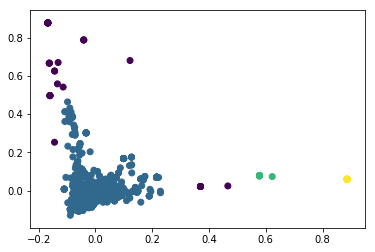

{0: [0, 2, 3, 4, 5, 6, 7, 9, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 93, 97, 98, 99, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 114, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

In [19]:
# satisfied comments
if __name__ == '__main__':
    dbscan = DbscanClustering(stopwords_path='STOP.txt')
    result3,words3,weights3,labels3 = dbscan.dbscan('unsatisfied_E.txt', eps=0.05, min_samples=10,fig=True)
    print(result3)

In [20]:
print("共计E系列满意评论clusters：",len(result3))
for i in result3:
    print(i,type(result3[i]),len(result3[i]))
    length = len(result3[i])
    print( words[result3[i][length-6]], words3[result3[i][length-1]],words3[result3[i][length-2]],words3[result3[i][length-3]],
          words[result3[i][length-4]],words3[result3[i][length-5]],words3[result3[i][length-7]],words3[result3[i][length-8]])

共计E系列满意评论clusters： 4
0 <class 'list'> 1611
小s 很无语 很快 很差 小个子 很大 很丑 待车
1 <class 'list'> 10
12w oooo cla c300ge 270 90 2011 200
2 <class 'list'> 20
50w tm ok mercedes 5800 gv ecu easy
-1 <class 'list'> 33
头痛 待修 强奸 引入 审美 小石头 小桌 家庭


In [21]:
labels_original3 = labels_to_original(labels3, words3)
for i in range(len(result3)):
    print(labels_original3[i])
    print()

['10', '12', '13', '14', '1800', '18200', '184ps300nm', '20', '200l', '20w', '211', '2200', '234', '23p', '243ps', '245', '2500', '255', '2554018', '260', '260l', '2800', '2rmb', '300', '300l', '33w', '3d', '3e', '40r18', '430', '45', '46', '47w', '4matic', '4s店', '5000', '50w', '523', '525', '53', '555', '570', '59w', '5at', '5m', '60', '6000', '62', '666', '66666666666', '68', '6at', '7000', '8at', '980', '9at', 'a6', 'a6l', 'a7', 'a8', 'ac', 'amg', 'app', 'audi', 'bb', 'benz', 'bmw', 'bmw5', 'c63amg', 'carplay', 'cd', 'china', 'cls', 'command', 'ct6', 'diy', 'dpr', 'e200l', 'e230', 'e260', 'e260l', 'e300', 'e300l', 'e320', 'e63', 'eco', 'fix', 'g5', 'gla', 'glk', 'great', 'hold', 'in', 'ld', 'led', 'low', 'm1', 'm272', 'made', 'maliya188', 'mb', 'mbux', 'mercedesme', 'ml', 'mp3', 'mubx', 'nvh', 'p7', 'pack', 'pp', 'ps3', 'qj', 'qq', 'r17', 'r18', 'r400', 'sb', 'ssss', 'tmd', 'u盘', 'v6', 'v6t272', 'zf', '一万公里', '一个多月', '一个胎', '一二十', '一倍', '一分货', '一分钱', '一切正常', '一千多公里', '一半', '一台', '一

words is:  3798
words is:  ['10', '105km', '12', '13', '14', '1800', '18200', '184ps300nm', '1w9', '20', '200', '200l', '2011', '2012', '20w', '211', '2200', '234', '23p', '243ps', '245', '2500', '255', '2554018', '260', '2601', '260l', '280', '2800', '2rmb', '300', '300l', '33w', '360', '3700', '3d', '3e', '40r18', '40w', '430', '4300k', '45', '46', '47w', '4matic', '4s', '4s店', '5000', '50w', '523', '525', '53', '555', '570', '59w', '5at', '5m', '60', '6000', '62', '666', '66666666666', '68', '6at', '7000', '8at', '90', '980', '9at', '9l', 'a6', 'a6l', 'a7', 'a8', 'ac', 'amg', 'app', 'audi', 'bb', 'benz', 'bmw', 'bmw5', 'c300ge', 'c63amg', 'carplay', 'cc', 'cd', 'china', 'cla', 'cls', 'command', 'ct6', 'diy', 'dpr', 'dvd', 'e1', 'e200', 'e200l', 'e230', 'e260', 'e260l', 'e300', 'e300l', 'e320', 'e320l', 'e63', 'easy', 'eco', 'ecu', 'fix', 'g5', 'gla', 'glk', 'gps', 'great', 'gv', 'hold', 'in', 'ld', 'lde', 'led', 'low', 'm1', 'm272', 'made', 'maliya188', 'mb', 'mbux', 'mercedes', 'me

Silhouette Coefficient: 0.838
y is: [0 1 0 ... 0 0 0]


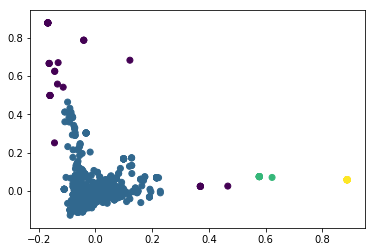

{0: [0, 2, 3, 4, 5, 6, 7, 9, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 39, 41, 42, 43, 44, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 83, 84, 86, 87, 89, 90, 91, 92, 93, 97, 98, 99, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 114, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 133, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248

In [22]:
# unsatisfied comments
if __name__ == '__main__':
    dbscan = DbscanClustering(stopwords_path='STOP.txt')
    result4,words4,weights4,labels4 = dbscan.dbscan('unsatisfied_E.txt', eps=0.05, min_samples=10,fig=True)
    print(result4)

In [23]:
print("共计E系列不满意clusters：",len(result4))
for i in result4:
    print(i,type(result4[i]),len(result4[i]))
    length = len(result4[i])
    print( words4[result4[i][length-6]], words4[result4[i][length-1]],words4[result4[i][length-2]],words4[result4[i][length-3]],
          words4[result4[i][length-4]],words4[result4[i][length-5]],words4[result4[i][length-7]],words4[result4[i][length-8]])
      

共计E系列不满意clusters： 4
0 <class 'list'> 1611
很响 很无语 很快 很差 很小 很大 很丑 待车
1 <class 'list'> 10
2012 oooo cla c300ge 9l 90 2011 200
2 <class 'list'> 20
gps tm ok mercedes lde gv ecu easy
-1 <class 'list'> 33
小沟 待修 强奸 引入 开惯 小石头 小桌 家庭


In [24]:
labels_original4 = labels_to_original(labels4, words4)
for i in range(len(result4)):
    print(labels_original4[i])
    print()

['10', '12', '13', '14', '1800', '18200', '184ps300nm', '20', '200l', '20w', '211', '2200', '234', '23p', '243ps', '245', '2500', '255', '2554018', '260', '260l', '2800', '2rmb', '300', '300l', '33w', '3d', '3e', '40r18', '430', '45', '46', '47w', '4matic', '4s店', '5000', '50w', '523', '525', '53', '555', '570', '59w', '5at', '5m', '60', '6000', '62', '666', '66666666666', '68', '6at', '7000', '8at', '980', '9at', 'a6', 'a6l', 'a7', 'a8', 'ac', 'amg', 'app', 'audi', 'bb', 'benz', 'bmw', 'bmw5', 'c63amg', 'carplay', 'cd', 'china', 'cls', 'command', 'ct6', 'diy', 'dpr', 'e200l', 'e230', 'e260', 'e260l', 'e300', 'e300l', 'e320', 'e63', 'eco', 'fix', 'g5', 'gla', 'glk', 'great', 'hold', 'in', 'ld', 'led', 'low', 'm1', 'm272', 'made', 'maliya188', 'mb', 'mbux', 'mercedesme', 'ml', 'mp3', 'mubx', 'nvh', 'p7', 'pack', 'pp', 'ps3', 'qj', 'qq', 'r17', 'r18', 'r400', 'sb', 'ssss', 'tmd', 'u盘', 'v6', 'v6t272', 'zf', '一万公里', '一个多月', '一个胎', '一二十', '一倍', '一分货', '一分钱', '一切正常', '一千多公里', '一半', '一台', '一